## Importing Libraries


In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Importing Dataset


In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('spam.csv', encoding='latin-1')
df = df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'])
df = df.rename(columns={'v1': 'label', 'v2': 'text'})

# Drop duplicates from the DataFrame
df.drop_duplicates(inplace=True)

X = df['text']
Y = df['label'].astype('category').values

## Encoding


In [107]:
#Using Label Encoding to convert ham and spam into 0 and 1 respectively.
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y = le.fit_transform(Y)

## Text preprocessing(cleaning)

In [108]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

# Download stopwords (only once)
nltk.download('stopwords')

# Initialize stemmer and stopword list
ps = PorterStemmer()
stop_words = set(stopwords.words('english'))

#  Define the reusable function
def preprocess(text):
    # 1. Remove non-letter characters
    text = re.sub('[^a-zA-Z]', ' ', text)

    # 2. Convert to lowercase
    text = text.lower()

    # 3. Tokenize
    words = text.split()

    # 4. Remove stopwords and apply stemming
    words = [ps.stem(word) for word in words if word not in stop_words]

    # 5. Join back to string
    cleaned_text = ' '.join(words)

    return cleaned_text


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [109]:
corpus = [preprocess(msg) for msg in X]

## TF-IDF (Convert text to features)

In [110]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(
    max_features=3000,
    ngram_range=(1, 2),       # include unigrams + bigrams
    min_df=5,                 # ignore rare words
    max_df=0.9,               # ignore very frequent words
)  # Use top 3000 important words
X_vectorized = tfidf.fit_transform(corpus).toarray()

# Spliting Dataset

In [111]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_vectorized, Y, test_size=0.2, random_state=42)

## Model Training

In [112]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB() # Create an instance of the model
model.fit(X_train,y_train)

MultinomialNB()

## Model Evaluation

In [113]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
y_pred=model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

Accuracy: 0.9796905222437138
Precision: 0.9769230769230769
Recall: 0.8758620689655172
F1 Score: 0.9236363636363636


## Confusion Matrix

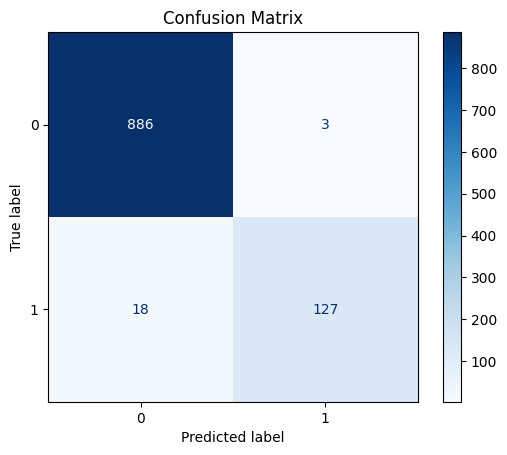

In [114]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


## ROC Curve

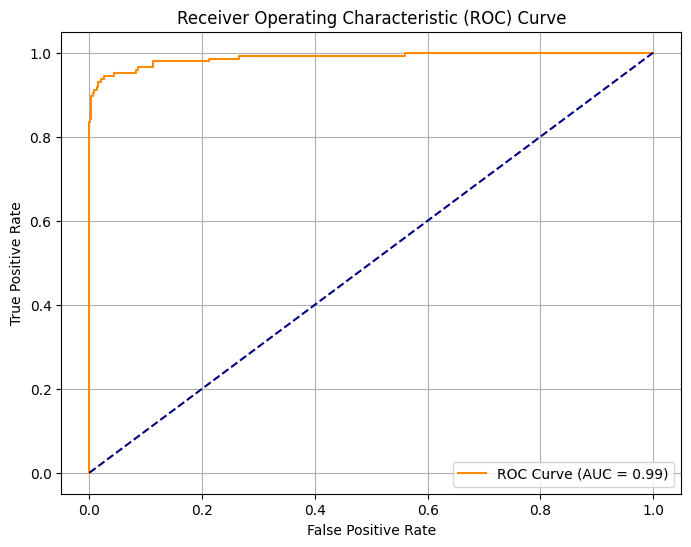

In [115]:
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities
y_probs = model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', label='ROC Curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()
